# Sample Superstore dataset to predict profit or loss

### Importing Libraries

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns                  
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler

### Loading Data

In [4]:
store = pd.read_csv('C:/SampleSuperstore.csv',encoding='Latin1')
store.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [5]:
store.tail(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9984,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,31.500,10,0.0,15.1200
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9986,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.240,1,0.0,15.2208
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100,5,0.0,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### Checking total rows and columns in the dataset

In [6]:
store.shape

(9994, 13)

### Column Info

In [7]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Statistical details of the dataset

In [9]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
store.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [11]:
store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### check the missing values

In [12]:
store.duplicated().sum()

17

In [13]:
store.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Columns Relation

<AxesSubplot:>

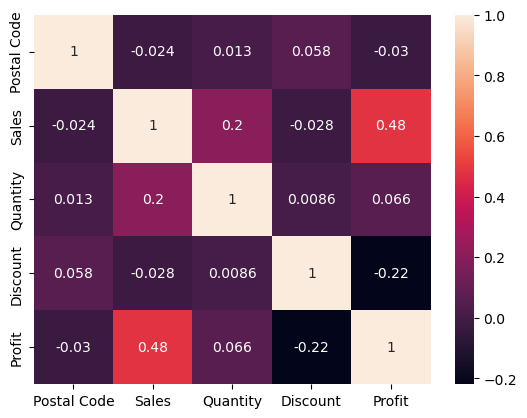

In [14]:
sns.heatmap(store.corr(), annot =True)

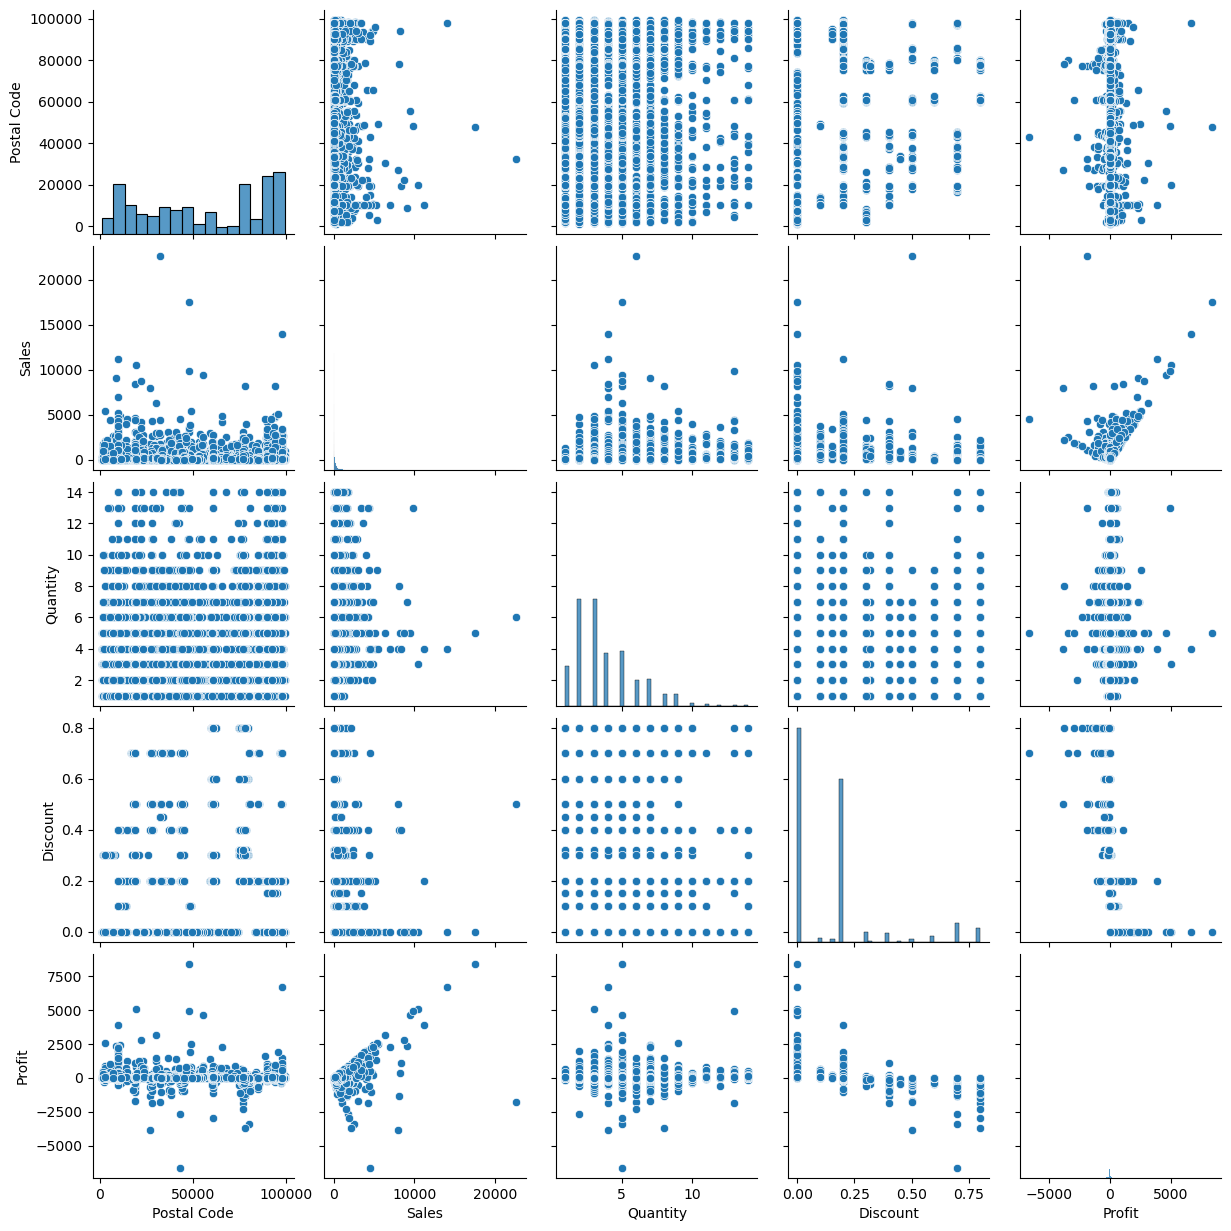

In [15]:
sns.pairplot(store)

In [16]:
p = store['Profit'].values.astype('O')

for j in range(len(p)):
    if p[j] > 0:
        p[j] = 'Gain'
    elif p[j] < 0:
        p[j] = 'Loss'
    else:
        p[j] = 'Nil'

### Column Profit

<AxesSubplot:>

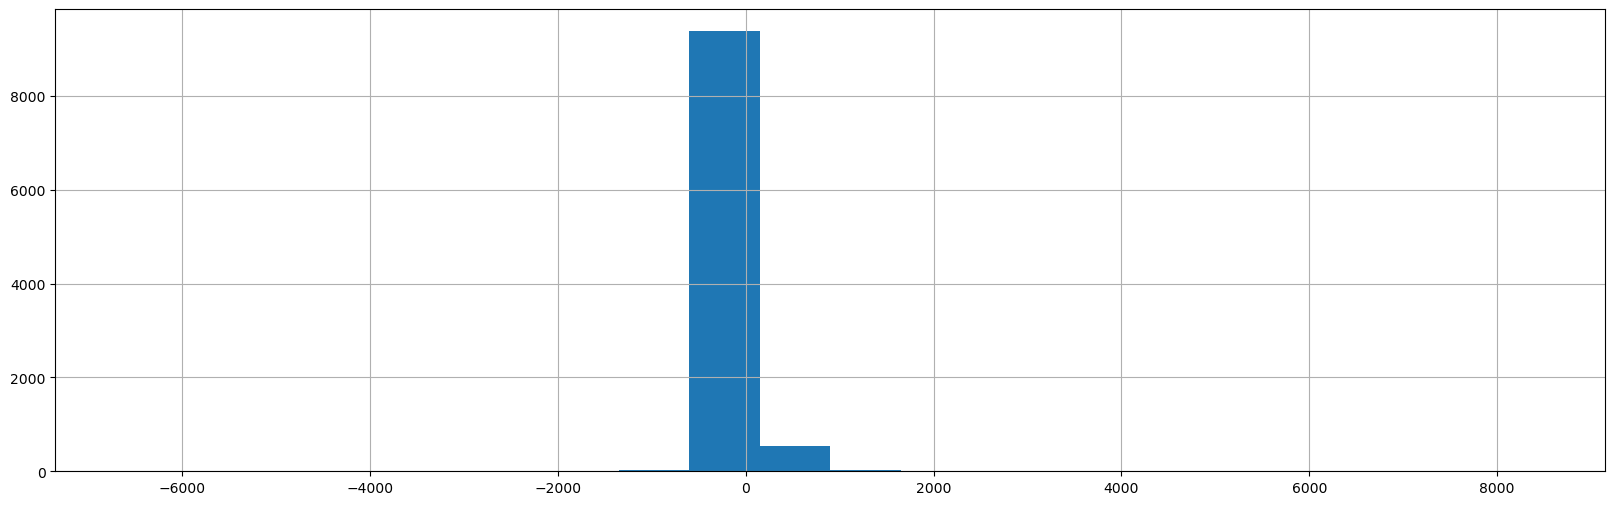

In [17]:
n_bins = 20
plt.figure(figsize = (20, 6))
store['Profit'].hist(bins = n_bins)

### Checking Mean, Median, Maximum & Minimum Profits

In [18]:
print("Mean Profit:", round(store['Profit'].mean()))

print("Median Profit:", round(store['Profit'].median()))

print("Highest Profit:", round(store['Profit'].max()))

print("Lowest Profit:", round(store['Profit'].min()))


Mean Profit: 29
Median Profit: 9
Highest Profit: 8400
Lowest Profit: -6600


### 5 Highest Gain present in the Dataset

In [19]:
store['Profit'].sort_values(ascending = False)[:5]

6826    8399.9760
8153    6719.9808
4190    5039.9856
9039    4946.3700
4098    4630.4755
Name: Profit, dtype: float64

### 5 Lowest Loss present in Dataset

In [20]:
store['Profit'].sort_values()[:5]

7772   -6599.9780
683    -3839.9904
9774   -3701.8928
3011   -3399.9800
4991   -2929.4845
Name: Profit, dtype: float64

### Independent Columns (Categorical)

Text(0.5, 1.0, 'Category')

<Figure size 640x480 with 0 Axes>

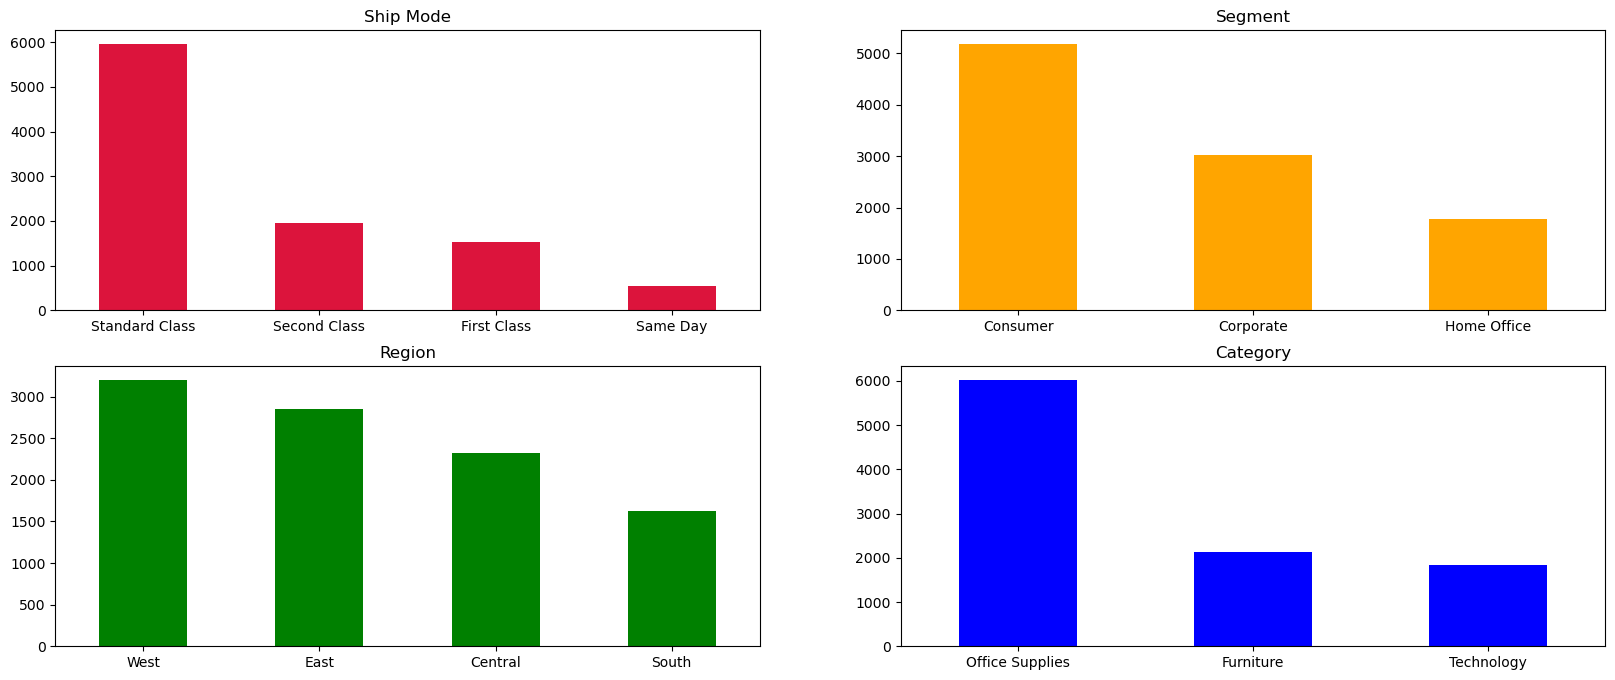

In [21]:
plt.figure(1)
plt.figure(figsize=(20,8))
# Column (Ship Mode)
plt.subplot(221)
store['Ship Mode'].value_counts().plot(kind='bar',color='crimson',rot=0)
plt.title('Ship Mode')
# Column (Segment)
plt.subplot(222)
store['Segment'].value_counts().plot(kind='bar',color='orange',rot=0)
plt.title('Segment')
# Column (Region)
plt.subplot(223)
store['Region'].value_counts().plot(kind='bar',color='green',rot=0)
plt.title('Region')
# Column (Category)
plt.subplot(224)
store['Category'].value_counts().plot(kind='bar',color='blue',rot=0)
plt.title('Category')

Insights from above plots:

1. Shipping through Standard Class is used most.
2. Most Customers are of Consumer Types.
3. West region has more Customers than other regions.
4. Most of ordered products belongs to Office Supplies category.

Text(0.5, 1.0, 'Sub-Category')

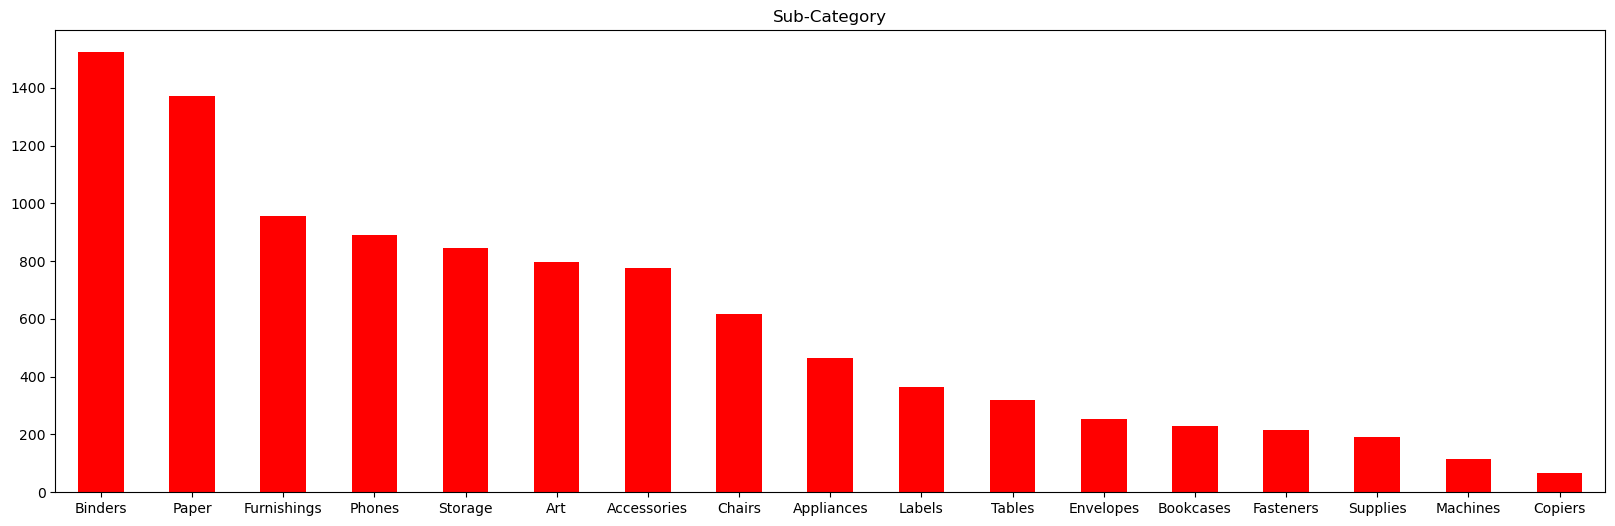

In [22]:
# Column (Sub-Category)
plt.figure(figsize=(20,6))
store['Sub-Category'].value_counts().plot(kind='bar',color='red',rot=0)
plt.title('Sub-Category')

Blinders Sub-Category is most ordered sub-category.

#### Independent Columns (Continous)

C:\Saad Application\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Saad Application\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Saad Application\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

<Figure size 640x480 with 0 Axes>

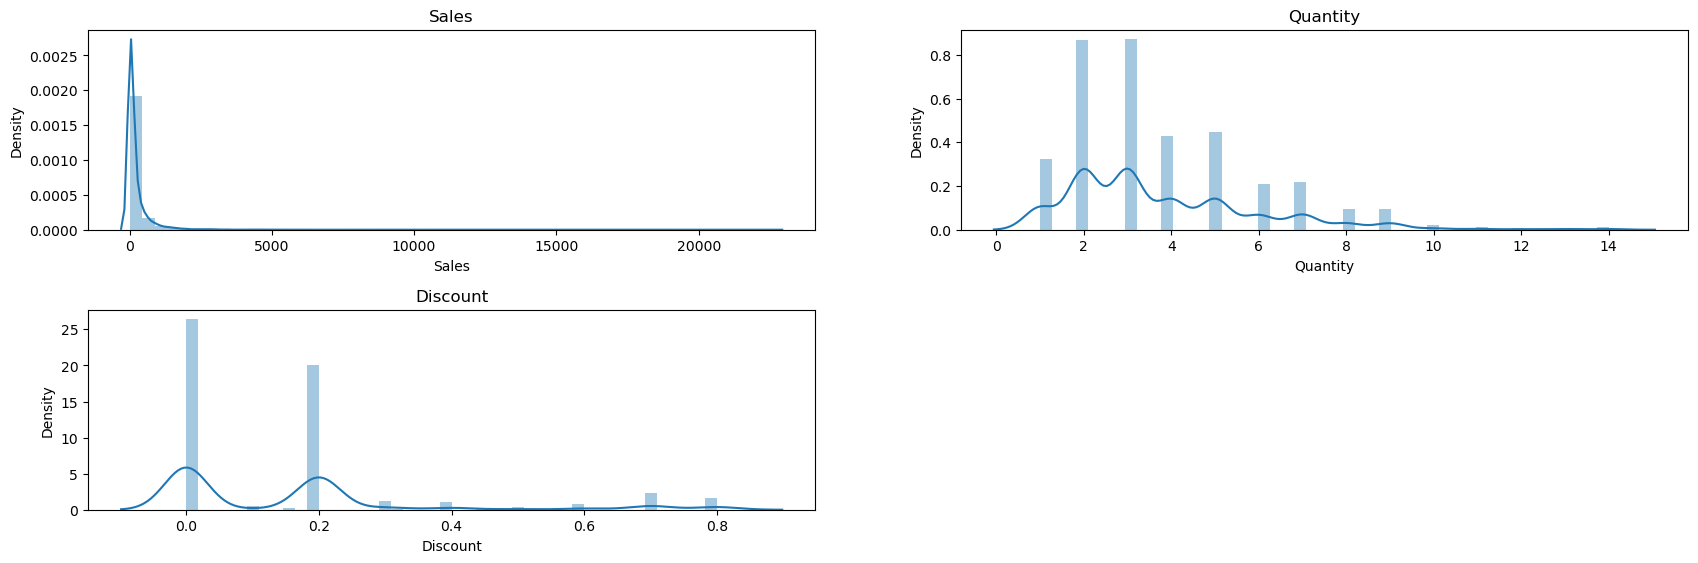

In [23]:
plt.figure(1)
plt.figure(figsize=(20,6))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
# Column (Sales)
plt.subplot(221)
sns.distplot(store['Sales'])
plt.title('Sales')
# Column (Quantity)
plt.subplot(222)
sns.distplot(store['Quantity'])
plt.title('Quantity')
# Column (Discount)
plt.subplot(223)
sns.distplot(store['Discount'])
plt.title('Discount')
plt.show()

#### Target Column vs Categorical Column

Text(0.5, 1.0, 'Category vs Profit')

<Figure size 640x480 with 0 Axes>

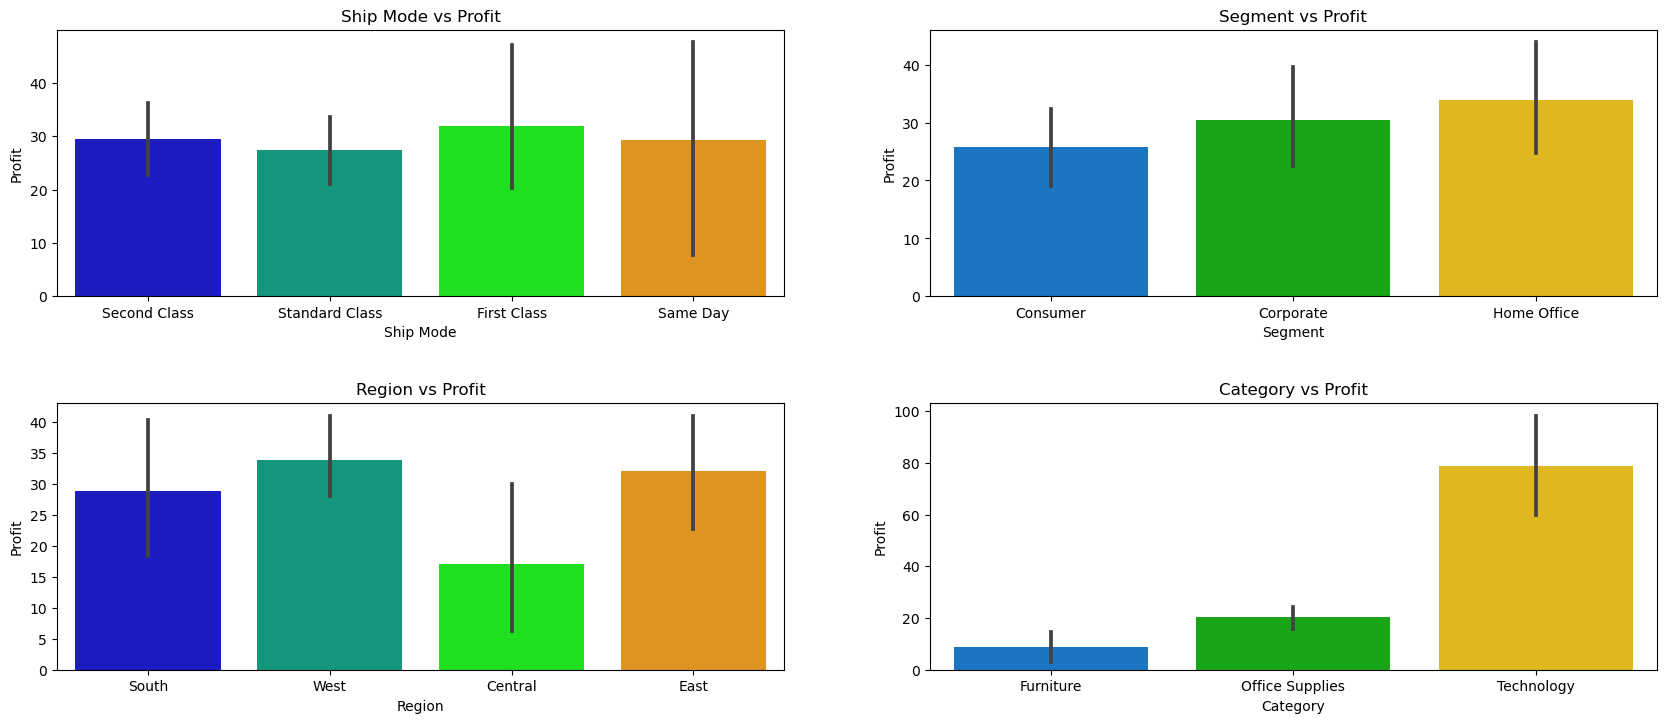

In [24]:
plt.figure(1)
plt.figure(figsize = (20, 8))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
# Column (Ship Mode vs Profit)
plt.subplot(221)
sns.barplot(x = store['Ship Mode'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Ship Mode vs Profit')
# Column (Segment vs Profit)
plt.subplot(222)
sns.barplot(x = store['Segment'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Segment vs Profit')
# Column (Region vs Profit)
plt.subplot(223)
sns.barplot(x = store['Region'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Region vs Profit')
# Column (Category vs Profit)
plt.subplot(224)
sns.barplot(x = store['Category'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Category vs Profit')

Insights from above plots

1. First Class shipping mode has marginly high profit than other shipping modes.
2. Customers of Home Office types generate more profit.
3. Profit is more in western region.
4. Technology product category has high profit.

Text(0.5, 1.0, 'Sub-Category')

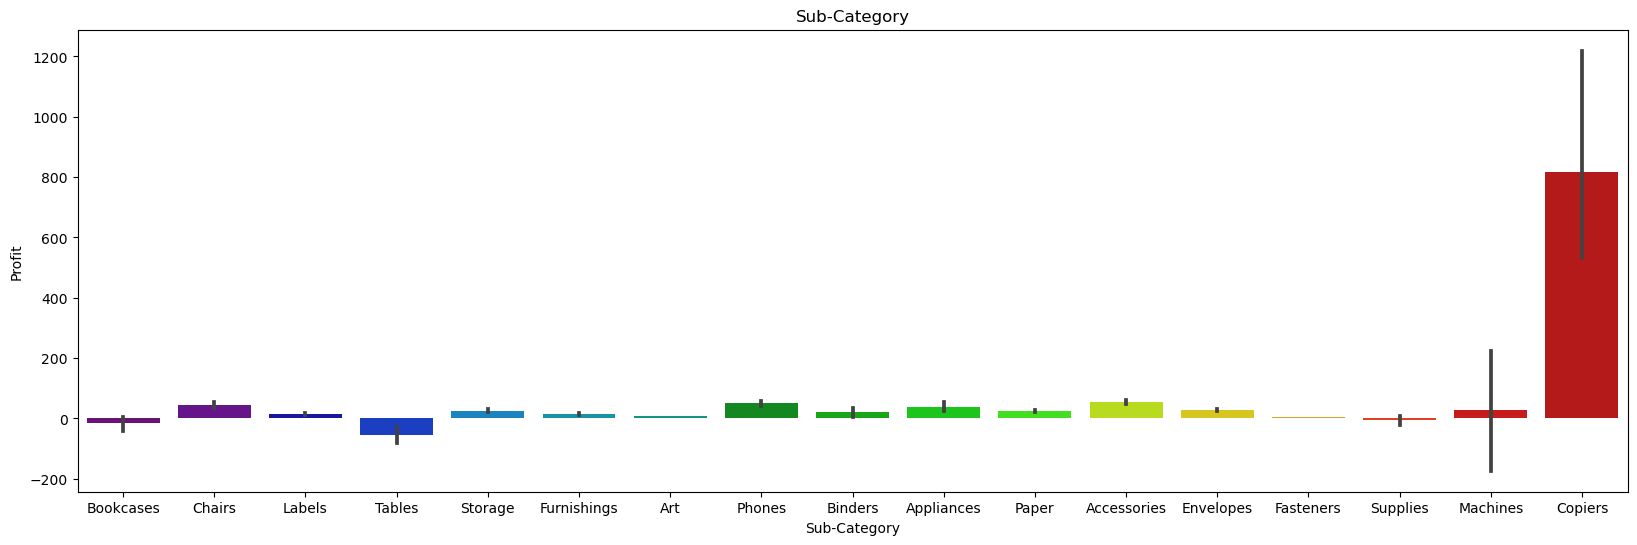

In [25]:
# Column (Sub-Category vs Profit)
plt.figure(figsize=(20,6))
sns.barplot(x = store['Sub-Category'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Sub-Category')

#### Target Column vs Countinous Column

Text(0, 0.5, 'Profit')

<Figure size 640x480 with 0 Axes>

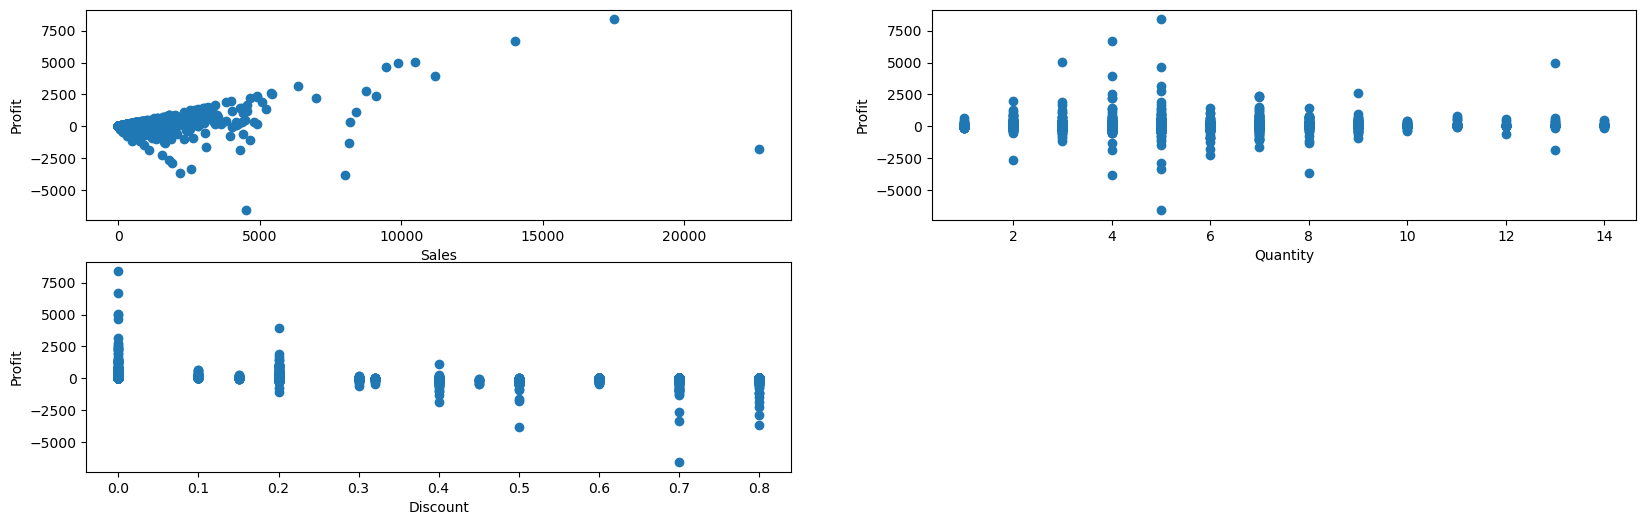

In [26]:
plt.figure(1)
plt.figure(figsize = (20, 6))
# Column (Sales vs Profit)
plt.subplot(221)
plt.ticklabel_format(style = 'plain')
plt.scatter(store['Sales'], store['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
# Column (Quantity vs Profit)
plt.subplot(222)
plt.ticklabel_format(style = 'plain')
plt.scatter(store['Quantity'], store['Profit'])
plt.xlabel('Quantity')
plt.ylabel('Profit')
# Column (Discount vs Profit)
plt.subplot(223)
plt.ticklabel_format(style = 'plain')
plt.scatter(store['Discount'], store['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')

#### Outlier Treatment

In [27]:
ot_store = store[['Sales','Quantity','Discount','Profit']]
ot_store.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [28]:
fitted_data1, fitted_lambda = stats.boxcox(ot_store['Sales'])
store['Sales']=fitted_data1
fitted_data2, fitted_lambda = stats.boxcox(ot_store['Quantity'])
store['Quantity']=fitted_data2

<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

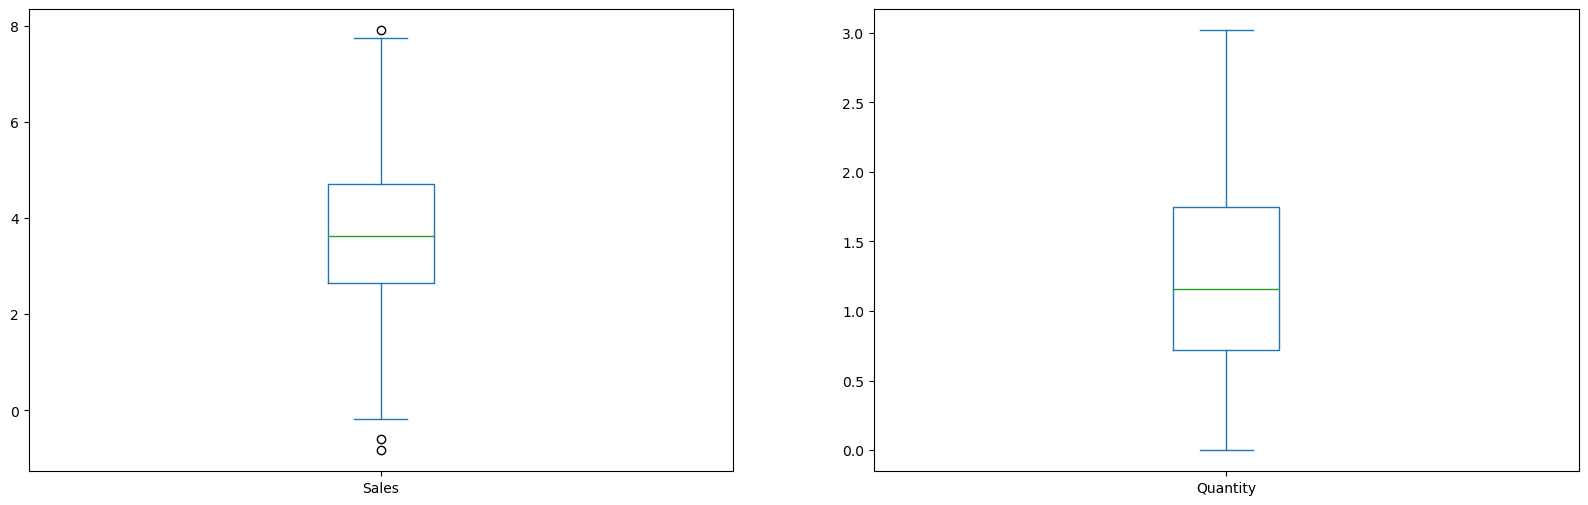

In [29]:
plt.figure(1)
plt.figure(figsize = (20, 6))
plt.subplot(121)
store['Sales'].plot(kind='box')
plt.subplot(122)
store['Quantity'].plot(kind='box')

here we got rid of the outliers.

### Classification Models

#### Target Column is 'Gain_Loss' for Classification Models

In [30]:
unique, counts = np.unique(p, return_counts=True)
dict(zip(unique, counts))

{'Gain': 8058, 'Loss': 1871, 'Nil': 65}

In [31]:
store['Gain_Loss']=p

In [32]:
store = store.drop(['Profit'],axis=1)

In [33]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Gain_Loss
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,4.866793,0.717567,0.00,Gain
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,5.627292,1.160800,0.00,Gain
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,2.511953,0.717567,0.00,Gain
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,5.819876,1.745231,0.45,Loss
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,2.880434,0.717567,0.20,Gain


In [34]:
x = store

In [35]:
x1 = x.select_dtypes('O')

for col in x1.columns:
    lb = LabelEncoder()
    x[col] = lb.fit_transform(x1[col].values)
x.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Gain_Loss
0,2,0,0,194,15,42420,2,0,4,4.866793,0.717567,0.00,0
1,2,0,0,194,15,42420,2,0,5,5.627292,1.160800,0.00,0
2,2,1,0,266,3,90036,3,1,10,2.511953,0.717567,0.00,0
3,3,0,0,153,8,33311,2,0,16,5.819876,1.745231,0.45,1
4,3,0,0,153,8,33311,2,1,14,2.880434,0.717567,0.20,0


In [36]:
x = store.drop(['Gain_Loss'],axis=1)
y = store['Gain_Loss']
x_train, x_test, y_train, y_test = train_test_split(x, y)

### Decision Tree Classifier Model

In [37]:
cm_dtc = Pipeline([('std_scaler', StandardScaler()),
                      ('dtc_classifier',DecisionTreeClassifier(max_depth=9))])

In [38]:
cm_dtc.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('dtc_classifier', DecisionTreeClassifier(max_depth=9))])

In [39]:
cm_dtc.score(x_train,y_train), cm_dtc.score(x_test,y_test)

(0.9599733155436958, 0.9455782312925171)

### Random Forest Classifier Model

In [40]:
cm_rfc = Pipeline([('std_scaler', StandardScaler()),('rfc_classifier',RandomForestClassifier(n_estimators=150,max_depth=7,random_state=5))])

In [41]:
cm_rfc.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rfc_classifier',
                 RandomForestClassifier(max_depth=7, n_estimators=150,
                                        random_state=5))])

In [42]:
cm_rfc.score(x_train,y_train), cm_rfc.score(x_test,y_test)

(0.9407605070046697, 0.9427771108443377)

### SVM Classifier Model

In [43]:
cm_svm = Pipeline([('std_scaler', StandardScaler()),('svm_classifier',SVC(kernel='poly',C=1500))])

In [44]:
cm_svm.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svm_classifier', SVC(C=1500, kernel='poly'))])

In [45]:
cm_svm.score(x_train,y_train), cm_svm.score(x_test,y_test)

(0.9633088725817212, 0.9231692677070829)

In [46]:
models = ['Decision Tree','Random Forest','SVM']
conclusion = pd.DataFrame(models,columns=['Models'])

In [47]:
m = [cm_dtc,cm_rfc,cm_svm]
train = []
test = []
for i in m:
    train.append(i.score(x_train,y_train))
    test.append(i.score(x_test,y_test))

In [48]:
conclusion['Train_score']=train
conclusion['Test_score']=test

In [49]:
conclusion.style.highlight_max(1)

,Models,Train_score,Test_score
0,Decision Tree,0.959973,0.945578
1,Random Forest,0.940761,0.942777
2,SVM,0.963309,0.923169


#### In conclusion, the SVM model demonstrated superior performance compared to Decision Tree and Random Forest based on the accuracy scores obtained from both training and test sets. While all models exhibited high accuracy on the training data, the SVM model's ability to generalize to unseen data, as reflected in its test accuracy, is particularly noteworthy. These findings suggest that SVM could be a strong candidate for future predictions on similar datasets.